# 1. Подготовка данных

#### 1.1. Откроем файлы и изучим их.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, make_scorer

train = pd.read_csv('/datasets/gold_recovery_train.csv') 
test = pd.read_csv('/datasets/gold_recovery_test.csv') 
full = pd.read_csv('/datasets/gold_recovery_full.csv')

display(train.head(), test.head(), full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Посмотрим общую информацию о данных - типы данных, наличие пропусков и дубликатов.

In [39]:
datasets = [train, test, full]
names = ['train', 'test', 'full']

In [40]:
for df, k in zip(datasets, names):
    print('Информация о датасете', k)
    df.info()
    print()
    print('Количество дубликатов:', df.duplicated().sum())
    print()

Информация о датасете train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.i

Дубликатов нет. Численные признаки имеют вещественный тип, преобразование типов не требуется. В данных присутствуют пропуски, требуется их проанализировать и заполнить.

#### 1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

Эффективность обогащения рассчитывается по формуле:
C*(F-T) / F*(C-T) * 100

C — доля золота в концентрате после флотации/очистки; rougher.output.concentrate_au   
F — доля золота в сырье/концентрате до флотации/очистки; rougher.input.feed_au       
T — доля золота в отвальных хвостах после флотации/очистки. rougher.output.tail_au 

In [41]:
train_new = train.copy(deep=True) # создадим независимую копию датафрейма

Рассчитаем эффективность обогащения:

In [42]:
train_new['rougher.output.recovery_my'] = (train_new['rougher.output.concentrate_au'] * (train_new['rougher.input.feed_au'] - train_new['rougher.output.tail_au'])) / (train_new['rougher.input.feed_au'] * (train_new['rougher.output.concentrate_au'] - train_new['rougher.output.tail_au'])) * 100

Проверим столбцы эффективности 'rougher.output.recovery_my','rougher.output.recovery' на наличие пропусков. И удалим все строки с пропусками.

In [43]:
print(train_new['rougher.output.recovery_my'].isna().sum(), train_new['rougher.output.recovery'].isna().sum())

2283 2573


In [44]:
train_new.dropna(subset=['rougher.output.recovery_my','rougher.output.recovery'], inplace=True)

In [45]:
print(train_new['rougher.output.recovery'].isna().sum(), train_new['rougher.output.recovery_my'].isna().sum())

0 0


Найдем MAE между нашими расчётами и значением признака:

In [46]:
MAE = mean_absolute_error(train_new['rougher.output.recovery_my'], train_new['rougher.output.recovery'])
MAE

9.444891926100695e-15

MAE между нашими расчётами и значением признака очень малО, это говорит о том, что эффективность обогащения рассчитана правильно.

Установим столбец с датой `date` в качестве индексов датафреймов:

In [47]:
test.set_index('date', inplace=True)
train.set_index('date', inplace=True)
full.set_index('date', inplace=True)

Из полного датасета подтянем таргеты (rougher.output.recovery; final.output.recovery) в тестовый датасет, чтобы можно было измерять качество 

In [48]:
test = test.join(full[['rougher.output.recovery', 'final.output.recovery']], how='left')
test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


#### 1.3. Проанализируем признаки, недоступные в тестовой выборке.

In [49]:
not_in_test = []
for i in list(full):
    if i not in list(test):
        not_in_test.append(i) 
full[not_in_test].head()        

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,...,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,10.411962,0.895447,16.904297,2.143149,8.547551,10.389648,...,28.029297,19.793808,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,10.462676,0.927452,16.634514,2.224930,8.558743,10.497069,...,28.067063,20.050975,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,10.507046,0.953716,16.208849,2.257889,8.603505,10.354494,...,27.454037,19.737170,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,10.422762,0.883763,16.532835,2.146849,7.221879,8.496563,...,27.341277,19.320810,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,10.360302,0.792826,16.525686,2.055292,9.089428,9.986786,...,27.041023,19.216101,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


Посмотрим, что это за признаки:

In [50]:
full[not_in_test].info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 32 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.output.concentrate_ag                 22618 non-null float64
primary_cleaner.output.concentrate_pb                 22268 non-null float64
primary_cleaner.output.concentrate_sol                21918 non-null float64
primary_cleaner.o

В тестовой выборке отсутствуют признаки со значениями концентрации металлов в концентрате и хвостах на различных этапах очистки. Это расчетные (calculation) и выходные (output) характеристики процесса, которые невозможно получить/измерить во время выполнения технологического процесса.  
Нас интересует эффективность, а она больше зависит не от содержания металлов, а от технологического процесса, поэтому их отсуствие не должно повлиять на качество модели.

Из трейнового датасета удалим все признаки, которых нет в тестовом:

In [51]:
train = train.drop(not_in_test, axis=1)
train.shape

(16860, 54)

#### 1.4. Проведем предобработку данных.  

Пропуски в таргетах ничем заполнять не надо, а надо просто их удалить, иначе оценки будут смещенными и делать по ним какие-то выводы будет неправильным.  
Проверим на наличие и удалим пропуски в тестовом и трейновой датасете в таргетах. 

In [52]:
print('Пропуски в таргетах в тестовом датасете:', test['rougher.output.recovery'].isna().sum(), test['final.output.recovery'].isna().sum())

Пропуски в таргетах в тестовом датасете: 546 442


In [53]:
test.dropna(subset=['rougher.output.recovery','final.output.recovery'], inplace=True)

In [54]:
print('Пропуски в таргетах в тестовом датасете:', test['rougher.output.recovery'].isna().sum(), test['final.output.recovery'].isna().sum())

Пропуски в таргетах в тестовом датасете: 0 0


In [55]:
print('Пропуски в таргетах в трейновом датасете:', train['rougher.output.recovery'].isna().sum(), train['final.output.recovery'].isna().sum())

Пропуски в таргетах в трейновом датасете: 2573 1521


In [56]:
train.dropna(subset=['rougher.output.recovery','final.output.recovery'], inplace=True)

In [57]:
print('Пропуски в таргетах в трейновом датасете:', train['rougher.output.recovery'].isna().sum(), train['final.output.recovery'].isna().sum())

Пропуски в таргетах в трейновом датасете: 0 0


Заполним пропуски в признаках.  
Самый оптимальный вариант - заполнить пропуски соседними данными. 
Технологические данные меняются во времени плавно и непрерывно и в нормальном режиме не дают выбросов. Поэтому этот метод с точки зрения природы данных будет оптимальным.
Для заполнения используем метод fillna(method = 'ffill')

In [58]:
train = train.fillna(method = 'ffill')
test = test.fillna(method='ffill')
full = full.fillna(method='ffill')

# 2. Анализ данных

#### 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки (в сырье, в черновом и финальном концентратах).

In [59]:
def histo_maker(columns, stage):
    
    """ Функция для построения гистограммы.
    Принимает на вход список столбцов и название этапа очистки
    
    """
    fig, ax = plt.subplots(figsize=(10,6), sharex=True)
    ax.set_title('Гистограммы концентрации {}'.format(stage), size=16)
    ax.set_ylabel('Frequency')
    for i in columns:
        sns.distplot(i, ax=ax, kde=False, label=i.name, axlabel='concentrate')
        plt.legend()

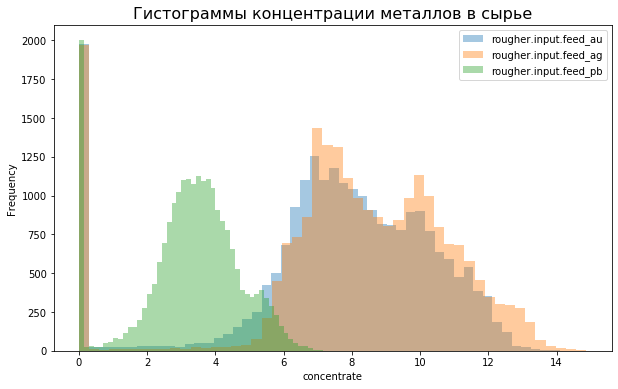

In [60]:
histo_maker(columns=[full['rougher.input.feed_au'], full['rougher.input.feed_ag'], full['rougher.input.feed_pb']], stage='металлов в сырье')      

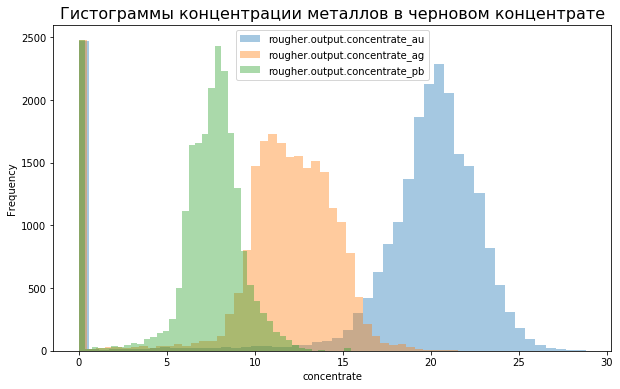

In [61]:
histo_maker(columns=[full['rougher.output.concentrate_au'], full['rougher.output.concentrate_ag'], full['rougher.output.concentrate_pb']], stage='металлов в черновом концентрате')     

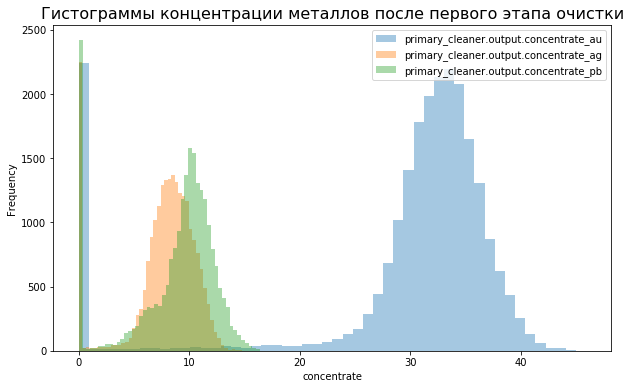

In [62]:
histo_maker(columns=[full['primary_cleaner.output.concentrate_au'], full['primary_cleaner.output.concentrate_ag'], full['primary_cleaner.output.concentrate_pb']], stage='металлов после первого этапа очистки')     

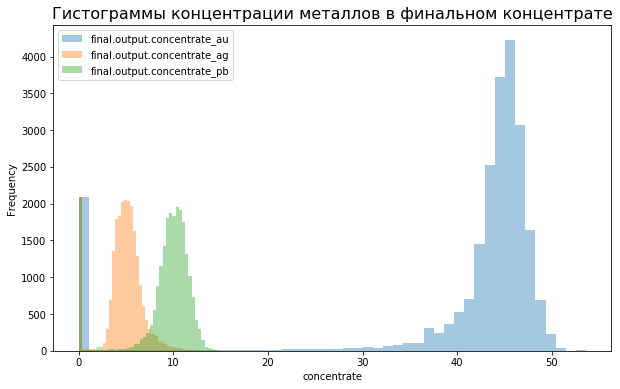

In [63]:
histo_maker(columns=[full['final.output.concentrate_au'], full['final.output.concentrate_ag'], full['final.output.concentrate_pb']], stage='металлов в финальном концентрате')        

На всех этапах очистки по всем металлам мы видим аномальные значения в нуле. 

Концентрация золота (Au) растет после каждого этапа очистки. В финальном концентрате количество золота становится значительно выше, большая часть значений сосредоточена в промежутке 40-50 единиц.  
Концентрация серебра (Ag) после флотации несколько увеличивается, а затем после каждого этапа очистки уменьшается. В финальном концентрате бОльшая часть значений концентрации серебра менее 10 единиц.  
Концентрация свинца (Pb) после флотации несколько увеличивается, как и после первого этапа очистки, после второго этапа очистки - практически не меняется. 

#### 2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [64]:
def kde_maker(columns, stage):
    
    """ Функция для построения гистограммы - строит ядерную оценку плотности (Kernel Density Estimation, KDE)
    Принимает на вход список столбцов и название этапа очистки
    
    """
    fig, ax = plt.subplots(figsize=(10,6), sharex=True)
    ax.set_title('Гистограммы этапа {}'.format(stage), size=16)
    ax.set_ylabel('Frequency')
    for i in columns:
        sns.distplot(i, ax=ax, kde=True, hist=False, label=i.name, axlabel='feed_size')
        plt.legend()

Построим распределения размеров гранул сырья на обучающей и тестовой выборках на этапе сырья:

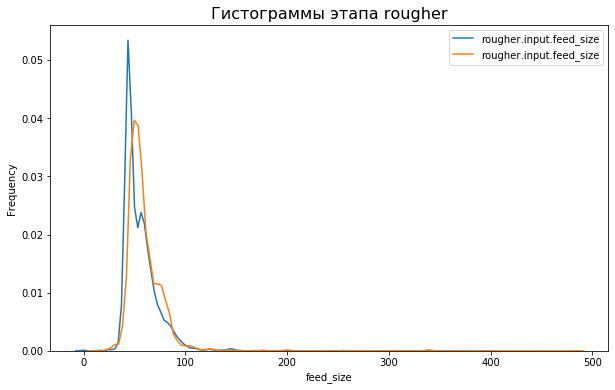

In [65]:
kde_maker(columns = [test['rougher.input.feed_size'], train['rougher.input.feed_size']], stage='rougher')  

Построим распределения размеров гранул на обучающей и тестовой выборках на этапе первичной очистки:

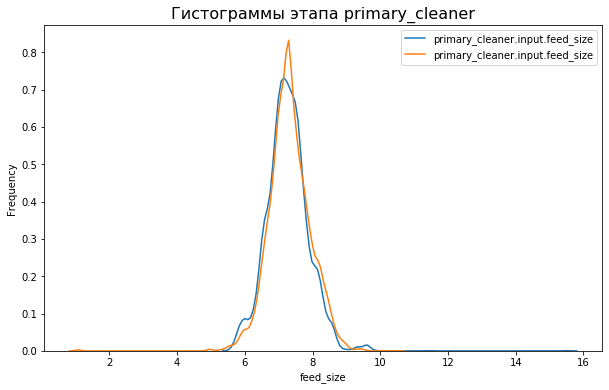

In [66]:
kde_maker(columns = [test['primary_cleaner.input.feed_size'], train['primary_cleaner.input.feed_size']], stage='primary_cleaner')


Графики для train и test получились похожими друг на друга, а значит можно сделать вывод, что размер гранул почти не отличается. Особенно схожи распределения после первого этапа очистки (primary_cleaner).

#### 2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Проанализируем аномальные значения в суммарном распределении.

Просуммируем все 4 вещества на каждой стадии и добавим новые переменные в каждый датафрейм:

In [67]:
# сырье
full['sum_rougher.input.feed'] = full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)  

# черновой концентрат
full['sum_rougher.concentrate'] = full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)  

# финальный концентрат
full['sum_final.concentrate'] = full[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)  

Построим гистограммы распределения суммарной концентрации всех веществ в сумме на разных стадиях:

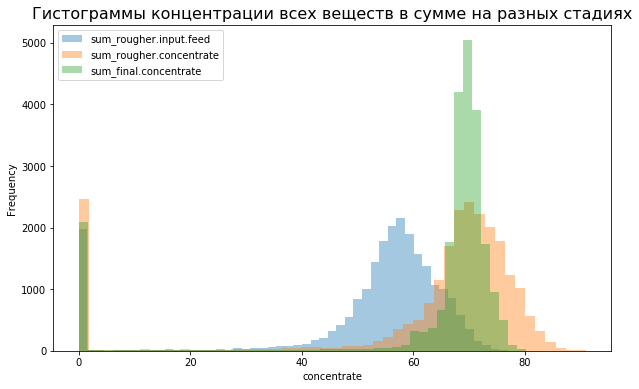

In [68]:
histo_maker(columns=[full['sum_rougher.input.feed'], full['sum_rougher.concentrate'], full['sum_final.concentrate']], stage='всех веществ в сумме на разных стадиях')        

Видим столбец аномальных значений в нуле. Очевидно, что это какие-то аномалии, так как не может быть, чтобы концентрации всех веществ вместе в какой-то стадии были равны нулю. Такие значения необходимо удалить из трейна и теста, используя индексы этих строк.

In [69]:
# для теста
 
full_test = full.loc[test.index] # сохраним датасет фулл с индексами строк из тестового
test = test[full_test['sum_rougher.input.feed'] > 0] # перезапишем в тестовый только те строки, где суммы не равны 0
test = test[full_test['sum_rougher.concentrate'] > 0]
test = test[full_test['sum_final.concentrate'] > 0]
test.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(5154, 54)

In [70]:
# для трейна
 
full_train = full.loc[train.index]
train = train[full_train['sum_rougher.input.feed'] > 0]
train = train[full_train['sum_rougher.concentrate'] > 0]
train = train[full_train['sum_final.concentrate'] > 0]
train.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(13795, 54)

# 3. Модель

Признаки для обучения модели - признаки, которые есть в трейне и тестовом датасете (53 переменных)  

Целевые признаки:  
 1. эффективность обогащения чернового концентрата rougher.output.recovery;
 2. эффективность обогащения финального концентрата final.output.recovery.  
 
Сначала обучим на всех признаках модель под первый таргет, затем обучим вторую модель на этих же признаках под второй таргет.

Создадим переменные с признаками для обучения и тестовыми признаками, используя датасеты трейн и тест. 

In [71]:
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1) # признаки для обучения
target_train1 = train['rougher.output.recovery'] # цель обучения 1
target_train2 = train['final.output.recovery'] # цель обучения 2

features_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1) # тестовые признаки
target_test1 = test['rougher.output.recovery'] # тестовая цель 1
target_test2 = test['final.output.recovery'] # тестовая цель 2

#### 3.1. Напишем функцию для вычисления sMAPE.

In [72]:
def smape(y, pred):
    """Функция на вход принимает вектор истинных и предсказанных значений и вычисляет метрику sMAPE"""
    return sum(np.abs(y - pred) * 2 * 100/((np.abs(y) + np.abs(pred)))) / y.shape[0]
 
smape_score = make_scorer(smape, greater_is_better=False) 

По сути sMAPE - это нормированный MAE. Поэтому логика такая же, как в MAE: чем меньше, тем лучше (параметр greater_is_better=False)

#### 3.2. Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.   
Будем обучать модели: 
- Дерево решений в регрессии
- Случайный лес в регрессии
- Линейная регрессия

##### 3.2.1. Обучим модель на всех признаках под первый таргет - эффективность обогащения чернового концентрата rougher.output.recovery

Подбор параметров для дерева решений и случайного леса произведем с помощью GridSearchCV.  
Для модели линейной регрессии нет смысла в кросс-валидации, но вот стандартизировать признаки через standart scaler стоит. На деревянные модели это не повлияет.

In [73]:
scaler = StandardScaler() # cоздадим объект этой структуры
scaler.fit(features_train) # настроим его на обучающих данных (вычисление среднего и дисперсии)

features_train = scaler.transform(features_train) # стандартизируем признаки
features_test = scaler.transform(features_test)

In [74]:
%%time 

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),
                           param_grid={'max_depth': range(2,11),
                                       'min_samples_split': range(2,5,2),
                                       'random_state':[12345],
                                       'min_samples_leaf': range(2,11)},
                           scoring=smape_score
                           )


grid_search.fit(features_train, target_train1)

model_dt_grid_search = grid_search.best_estimator_
best_param = grid_search.best_params_
best_score = grid_search.best_score_

model_dt_grid_search.fit(features_train, target_train1) # обучим модель дерева решений

print('Лучшие параметры дерева решений:', best_param)
print('Лучшая sMAPE, рассчитанная GridSearchCV:', best_score)
print(model_dt_grid_search)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Лучшие параметры дерева решений: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 12345}
Лучшая sMAPE, рассчитанная GridSearchCV: -8.149834302396503
DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=12345, splitter='best')
CPU times: user 2min 47s, sys: 15.2 ms, total: 2min 47s
Wall time: 2min 59s


In [75]:
%%time 

grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid={'max_depth': range(2,11),
                                       'n_estimators': range(3,15,2),
                                       'min_samples_split':range(2,11,2),
                                       'random_state':[12345],
                                       'min_samples_leaf': range(2,4)},
                           scoring=smape_score,
                           )

grid_search.fit(features_train, target_train1)

model_rf_grid_search = grid_search.best_estimator_
best_param = grid_search.best_params_
best_score = grid_search.best_score_

model_rf_grid_search.fit(features_train, target_train1) # обучим модель случайного леса

print('Лучшие параметры случайного леса:', best_param)
print('Лучшая sMAPE, рассчитанная GridSearchCV:', best_score)
print(model_rf_grid_search)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Лучшие параметры случайного леса: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 9, 'random_state': 12345}
Лучшая sMAPE, рассчитанная GridSearchCV: -7.983656187805055
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
                      oob_score=False, random_state=12345, verbose=0,
                      warm_start=False)
CPU times: user 43min 28s, sys: 1.05 s, total: 43min 29s
Wall time: 44min 31s


In [76]:
model_lr = LinearRegression() 
model_lr.fit(features_train, target_train1) # обучение модели линейной регрессии
predictions = model_lr.predict(features_train) # предсказание 
smape_score_lr = smape(target_train1, predictions)

print('sMAPE модели линейной регрессии:', smape_score_lr)

sMAPE модели линейной регрессии: 4.646064586323582


Проверим качество моделей на тестовой выборке:

In [77]:
smape_score_dt_grid_search = smape(target_test1, model_dt_grid_search.predict(features_test)) # проверка качества на тестовой выборке
smape_score_rf_grid_search = smape(target_test1, model_rf_grid_search.predict(features_test))
smape_score_lr = smape(target_test1, model_lr.predict(features_test))

smape_rougher_list = [smape_score_dt_grid_search, smape_score_rf_grid_search, smape_score_lr]

print('sMAPE дерева решений', smape_score_dt_grid_search)
print('sMAPE случайного леса', smape_score_rf_grid_search)
print('sMAPE линейной регрессии', smape_score_lr)

sMAPE дерева решений 4.7734187805965975
sMAPE случайного леса 4.7106839790672925
sMAPE линейной регрессии 4.8529687249876625


Лучшую метрику сохраним в переменной smape_rougher_recovery:

In [78]:
smape_rougher_recovery = min(smape_rougher_list)
print('sMAPE лучшей модели на этапе чернового концентрата', smape_rougher_recovery)

sMAPE лучшей модели на этапе чернового концентрата 4.7106839790672925


##### 3.2.2. Обучим модель на всех признаках под второй таргет - эффективность обогащения финального концентрата final.output.recovery.

In [79]:
%%time
# время исполнения  

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),
                           param_grid={'max_depth': range(2,11),
                                       'min_samples_split': range(2,5,2),
                                       'random_state':[12345],
                                       'min_samples_leaf': range(2,11)},
                           scoring=smape_score
                           )


grid_search.fit(features_train, target_train2)

model_dt_grid_search = grid_search.best_estimator_
best_param = grid_search.best_params_
best_score = grid_search.best_score_

model_dt_grid_search.fit(features_train, target_train2) # обучим модель дерева решений

print('Лучшие параметры дерева решений:', best_param)
print('Лучшая sMAPE, рассчитанная GridSearchCV:', best_score)
print(model_dt_grid_search)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Лучшие параметры дерева решений: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 12345}
Лучшая sMAPE, рассчитанная GridSearchCV: -10.878226259501053
DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=12345, splitter='best')
CPU times: user 2min 23s, sys: 176 ms, total: 2min 23s
Wall time: 2min 25s


In [80]:
%%time 
# время исполнения 

grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid={'max_depth': range(2,11),
                                       'n_estimators': range(3,15,2),
                                       'min_samples_split':range(2,11,2),
                                       'random_state':[12345],
                                       'min_samples_leaf': range(2,4)},
                           scoring=smape_score,
                           )

grid_search.fit(features_train, target_train2)

model_rf_grid_search = grid_search.best_estimator_
best_param = grid_search.best_params_
best_score = grid_search.best_score_

model_rf_grid_search.fit(features_train, target_train2) # обучим модель случайного леса

print('Лучшие параметры случайного леса:', best_param)
print('Лучшая sMAPE, рассчитанная GridSearchCV:', best_score)
print(model_rf_grid_search)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Лучшие параметры случайного леса: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 7, 'random_state': 12345}
Лучшая sMAPE, рассчитанная GridSearchCV: -10.308661149759919
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
                      oob_score=False, random_state=12345, verbose=0,
                      warm_start=False)
CPU times: user 39min 36s, sys: 2.28 s, total: 39min 38s
Wall time: 39min 52s


In [81]:
model_lr = LinearRegression() 
model_lr.fit(features_train, target_train2) # обучение модели линейной регрессии
predictions = model_lr.predict(features_train) # предсказание 
smape_score_lr = smape(target_train2, predictions)

print('sMAPE модели линейной регрессии:', smape_score_lr)

sMAPE модели линейной регрессии: 8.106728691232764


Проверим качество моделей на тестовой выборке:

In [82]:
smape_score_dt_grid_search = smape(target_test2, model_dt_grid_search.predict(features_test)) # проверка качества на тестовой выборке
smape_score_rf_grid_search = smape(target_test2, model_rf_grid_search.predict(features_test))
smape_score_lr = smape(target_test2, model_lr.predict(features_test))

smape_final_list = [smape_score_dt_grid_search, smape_score_rf_grid_search, smape_score_lr]

print('sMAPE дерева решений', smape_score_dt_grid_search)
print('sMAPE случайного леса', smape_score_rf_grid_search)
print('sMAPE линейной регрессии', smape_score_lr)

sMAPE дерева решений 8.40730221539928
sMAPE случайного леса 7.720796123103609
sMAPE линейной регрессии 8.496911301015288


Лучшую метрику сохраним в переменной smape_final_recovery:

In [83]:
smape_final_recovery = min(smape_final_list)
print('sMAPE лучшей модели на этапе финального концентрата', smape_final_recovery)

sMAPE лучшей модели на этапе финального концентрата 7.720796123103609


#### 3.3. На основе двух метрик sMAPE считаем итоговое sMAPE:

In [84]:
final_smape = 0.25 * smape_rougher_recovery + 0.75 * smape_final_recovery
final_smape

6.968268087094529

#### 3.4. Сравним итоговую метрику качества sMAPE (`final_smape`) со sMAPE для константных моделей для каждой целевой переменной (каждому объекту они прогнозирует медиану целевого признака):

In [85]:
predictions_const1 = pd.Series(target_train1.median(), index=target_test1.index) # константная модель
smape_score_const1 = smape(target_test1, predictions_const1)

predictions_const2 = pd.Series(target_train2.median(), index=target_test2.index) # константная модель
smape_score_const2 = smape(target_test2, predictions_const2)

final_smape_const = 0.25 * smape_score_const1 + 0.75 * smape_score_const2

print('Финальная sMAPE константной модели:', final_smape_const)

Финальная sMAPE константной модели: 7.363660673394504


Проверку на адекватность модели прошли - итоговая метрика качества sMAPE у них выше, чем sMAPE у константных моделей.

## Вывод

Нами выполнена задача предсказания коэффициента восстановления золота из золотосодержащей руды.  
Мы предсказывали значения двух целевых признаков:  
  
 - эффективность обогащения чернового концентрата rougher.output.recovery;
 - эффективность обогащения финального концентрата final.output.recovery.

Были построены две модели - для каждого целевого признака. Лучшее качество мы получили на моделях случайного леса с метриками качества sMAPE равными и  соответственно. Итоговая метрика равна 6.97, что выше, чем итоговое sMAPE константной модели (7.36) 